In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('BTC-USD','2015-01-01','2024-04-08')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = pd.DataFrame(data)

In [4]:
data.reset_index(inplace=True)

In [5]:
data.drop(columns = ['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)

In [6]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3380,65980.812500
3381,68508.843750
3382,67837.640625
3383,68896.109375


<function matplotlib.pyplot.show(close=None, block=None)>

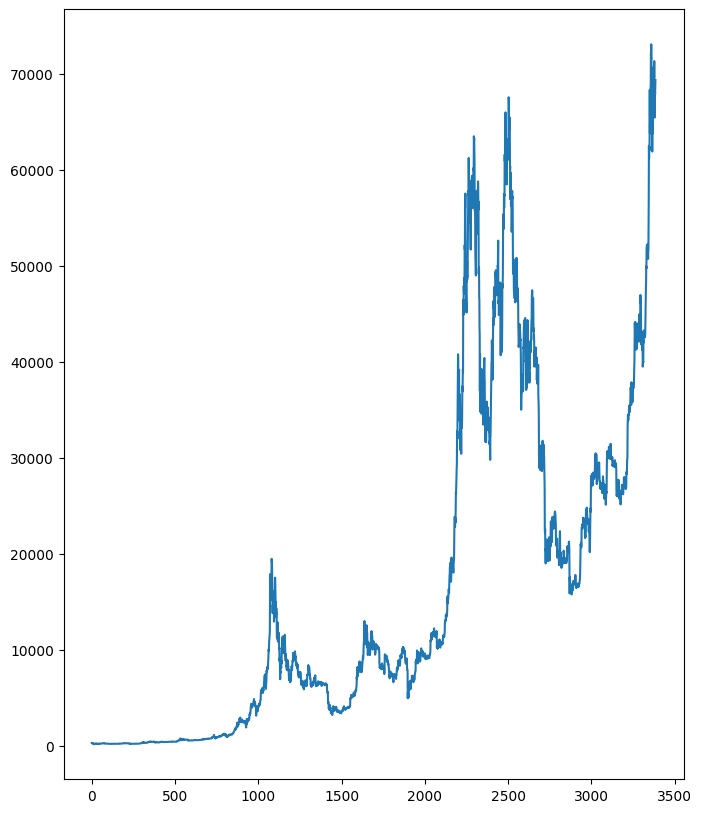

In [7]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show

In [8]:
train_data = data[:-100]
test_data = data[-100:]

In [9]:
train_data.shape

(3285, 1)

In [10]:
test_data.shape

(100, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
train_data_scale = scaler.fit_transform(train_data)

In [13]:
base_days = 100

In [14]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [17]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\Ravi Ranjan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x, y, epochs = 50, verbose = 1)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 206ms/step - loss: 0.0396
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - loss: 0.0048
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - loss: 0.0058
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - loss: 0.0044
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - loss: 0.0039
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - loss: 0.0032
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - loss: 0.0033
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - loss: 0.0035
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - loss: 0.0032
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - loss: 0.0040
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - loss: 0.0033
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - loss: 0.0028
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 200ms/step - loss: 0.0025
Epoch 14/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - loss: 0.0031
Epoch 15/50
100

In [22]:
test_data=pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [23]:
test_data

,Close
0,26567.632812
1,26579.568359
2,26579.390625
3,26256.826172
4,26298.480469
...,...
195,65980.812500
196,68508.843750
197,67837.640625
198,68896.109375


In [24]:
test_data_scale = scaler.transform(test_data)

In [26]:
x = []
y = []
for i in range(base_days, test_data_scale.shape[0]):
     x.append(test_data_scale[i-base_days:i])
     y.append(test_data_scale[i,0])

In [27]:
x, y = np.array(x), np.array(y)

In [28]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [29]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step


In [30]:
pred = scaler.inverse_transform(pred)

In [31]:
pred

array([[42122.09 ],
       [41835.35 ],
       [41624.523],
       [41755.066],
       [42304.844],
       [42803.523],
       [43199.152],
       [43465.54 ],
       [43583.023],
       [43572.035],
       [43871.176],
       [44380.53 ],
       [44967.832],
       [45436.066],
       [45259.16 ],
       [44529.06 ],
       [43437.824],
       [42381.98 ],
       [41705.918],
       [41451.742],
       [41338.86 ],
       [41271.926],
       [41228.55 ],
       [41191.582],
       [40915.977],
       [40458.535],
       [39981.99 ],
       [39595.04 ],
       [39575.92 ],
       [39958.95 ],
       [40555.895],
       [41301.324],
       [41984.06 ],
       [42412.332],
       [42616.098],
       [42669.844],
       [42615.52 ],
       [42455.316],
       [42250.5  ],
       [42117.86 ],
       [42249.2  ],
       [42738.2  ],
       [43674.1  ],
       [44882.746],
       [46083.53 ],
       [47236.086],
       [48126.645],
       [48937.07 ],
       [49621.344],
       [50119.926],


In [36]:
m = y
z = []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m, pred)
    z = np.append(z, pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━

In [37]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [38]:
z

array([[62316.63239303],
       [61796.10668256],
       [60455.26625678],
       [58747.28511876],
       [57023.86787557],
       [55489.15430685],
       [54223.9761015 ],
       [53225.50953277],
       [52451.23401535],
       [51845.80370141],
       [51355.47539888],
       [50936.01741631],
       [50554.72995351],
       [50190.07556682],
       [49828.86749246],
       [49464.64690732],
       [49095.65852181],
       [48723.19570722],
       [48350.11834043],
       [47980.45916919],
       [47617.69663927],
       [47264.59021052],
       [46923.1000233 ],
       [46594.37886505],
       [46278.85250395],
       [45976.34018938],
       [45686.2113024 ],
       [45407.56610646],
       [45139.36829786],
       [44880.59763963]])

In [39]:
model.save('Bitcoin_Price_prediction_Model.keras')